# TERM 1 PROJECT

- Submitted By: __Bhaskar Bharat__
- INSAID Batch: __January 2019__
- Dataset Used: __matches.csv__

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Which Teams are the Winners, 1st Runners-Up & 2nd Runners-Up in each season?](#section401)<br/>
    - 4.2 [What is the Match Winning Percentage of each Team?](#section402)<br/>
    - 4.3 [What is the Impact of Toss on the Match Winning Percentage of each Team?](#section403)<br/>
    - 4.4 [What is the Impact of Bat/Field First on the Match Winning Percentage of each Team?](#section404)<br/>
    - 4.5 [ What is the Impact of Playing at Home Venue & at Away Locations on the Match Winning Percentage of each Team?](#section405)<br/>
    - 4.6 [How each Team has Performed Season-Wise?](#section406)<br/>
    - 4.7 [Which Team has Won their Matches Comprehensively?](#section407)<br/>
    - 4.8 [How the Teams have Performed when they have Played against each other?](#section408)<br/>
    - 4.9 [What is the Match Winning Percentage of Teams on each Day of the Week?](#section409)<br/>
    - 4.10 [What is the Match Winning Percentage of Teams in each City?
](#section410)<br/>
5. [Conclusions](#section5)<br/> 

<a id=section1></a>

### 1. Problem Statement

__matches.csv__ dataset contains the various details of the __Indian Premier League (IPL)__ matches over its __11 seasons__.
The primary aim of this __Project__ is to __find out how the Match Winning Percentage of a Team is varying with respect to the various parameters with the help of the data present in the dataset__.

For the purpose of this Project my Assumption is:<br/>
__ASSUMPTION : I am an Analyst from Mumbai Indians Team__

So, I will be presenting my __observations & conclusions__ from the __perspective of Mumbai Indians Team's Analyst__.


<a id=section2></a>

### 2. Data Loading and Description
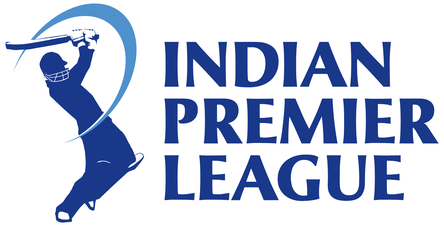

- The dataset consists of the information about __Indian Premier League (IPL)__ matches over its 11 seasons. Various variables present in the dataset includes data of season, city, player of match etc. 
- The dataset comprises of __696 observations of 18 columns__. Below is a table showing names of all the columns and their description.

| Column Name     | Description                                               |
| ----------------|:-------------                                            :| 
| Id              | Match Identity                                            | 
| Season          | Year of the Tournament                                    |  
| City            | City in which the match was played                        | 
| Date            | Date on which the match was played                        |   
| Team1           | Name of the first team                                    |
| Team2           | Name of the second team                                   |
| Toss_Winner     | Name of the team that won the coin toss                   |
| Toss_Decision   | Decision taken by the toss winner                         |
| Result          | Whether the result of the match was a tie or normal       |
| DL_Applied      | Whether Duckworth-Lewis Method was applied in the match   |
| Winner          | Name of the Team that won the match                       |
| Win_by_Runs     | The winner of the match won by how many runs              |
| Win_by_Wickets  | The winner of the match won by how many wickets           |
| Player_of_Match | Name of the Player whose performance was outstanding      |
| Venue           | Name of the Stadium where the match was played            |
| Umpire1         | Name of the first field umpire                            |
| Umpire2         | Name of the second field umpire                           |
| Umpire3         | Name of the off-field TV umpire                           |

#### Some Background Information
The __Indian Premier League (IPL)__ is a professional __Twenty20__ cricket league in India contested during April and May of every year by teams representing 8 Indian cities and some states. The league was founded by the __Board of Control for Cricket in India (BCCI)__ in __2008__.<br/>

The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on __YouTube__. The brand value of IPL in 2018 was USD 6.3 billion, according to __Duff & Phelps__. According to BCCI, the 2015 IPL season contributed ₹11.5 billion (USD 182 million) to the GDP of the Indian economy.<br/>

There have been __eleven seasons__ of the IPL tournament. The current IPL title holders are the __Chennai Super Kings__, who won the 2018 season. 

#### Importing packages

In [497]:
import math
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

#### Importing the Dataset

In [498]:
matches_data = pd.read_csv("D:/matches.csv")     # Importing training dataset using pd.read_csv

<a id=section3></a>

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [499]:
matches_data.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(696, 18)

matches_data has __696 rows__ and __18 columns__.

In [500]:
matches_data.columns                                            # This will print the names of all columns.

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [501]:
matches_data.head()                                                 # This will print the first 5 rows of the Data Frame

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [502]:
matches_data.tail()                                                  # This will print the last 5 rows of the Data Frame

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
691,7949,2018,Pune,20/05/18,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,L Ngidi,Maharashtra Cricket Association Stadium,Nitin Menon,Yeshwant Barde,Marais Erasmus
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
693,7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens,Nitin Menon,Anil Chaudhary,Kumar Dharmasena
694,7952,2018,Kolkata,25/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens,Nitin Menon,Kumar Dharmasena,Anil Chaudhary
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon


In [503]:
matches_data.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [504]:
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [505]:
matches_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

From the above output we can see that __city__, __winner__, __player_of_match__, __umpire1__, __umpire2__ and __umpire3__ columns contain __null values__. We will see how to deal with them.

<a id=section302></a>

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __correlation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [506]:
profile = pandas_profiling.ProfileReport(matches_data)
profile.to_file(outputfile="matches_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __matches_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section303></a>

### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Replacing missing entries of __city__ with __'Dubai'__.
    - Replacing missing values of __winner__ with __'NA'__.
    - Replacing missing values of __player_of_match__ with __'NA'__.
    - Replacing missing values of __umpire1__ and __umpire2__ with __'DNA'__.
    - Dropping the column __umpire3__ as it has too many _null_ values.
    - Converted the values of __date__ column to pandas __datetime__ with format __YYYY-MM-DD__.

In [507]:
matches_data[matches_data.city.isnull() & ~matches_data.venue.isnull()].venue

461    Dubai International Cricket Stadium
462    Dubai International Cricket Stadium
466    Dubai International Cricket Stadium
468    Dubai International Cricket Stadium
469    Dubai International Cricket Stadium
474    Dubai International Cricket Stadium
476    Dubai International Cricket Stadium
Name: venue, dtype: object

From the above output we can see that the rows where the value of __city__ is missing, the value of __venue__ at all these places is same, that is, __Dubai International Cricket Stadium__. So, we can safely replace the missing values of __city__ with __Dubai__.

In [508]:
matches_data.city = matches_data.city.fillna('Dubai')                      #To replace the missing values in City with Dubai

In [509]:
matches_data[matches_data.winner.isnull()][['result','winner']]

,result,winner
300,no result,NaN
545,no result,NaN
570,no result,NaN


From the above output we can see that when the value in __result__ column is __'no result'__, the value in the __winner__ column is missing. Logically, there should not be any values in the __winner__ column corresponding to the __'no result'__ values as there will be no winning team in this case. So, we can replace these values in the __winner__ column with __'NA'__, that is, __'Not Applicable'__.

In [510]:
matches_data['winner'] = matches_data.apply(lambda x: 'NA' if x['result'] == 'no result' else x['winner'],axis=1)

In [511]:
matches_data[matches_data.player_of_match.isnull()][['result','player_of_match']]

,result,player_of_match
300,no result,NaN
545,no result,NaN
570,no result,NaN


Similarly, from the above output we can see that when the value in __result__ column is __'no result'__, the value in the __player_of_match__ column is also missing. So, we can replace these values in the __player_of_match__ column also with __'NA'__, that is, __'Not Applicable'__.

In [512]:
matches_data['player_of_match'] = matches_data.apply(lambda x: 'NA' if x['result'] == 'no result' else x['player_of_match'],axis=1)

In [513]:
matches_data[matches_data.umpire1.isnull() | matches_data.umpire2.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [514]:
matches_data[matches_data.city=='Bangalore'][['umpire1', 'umpire2']].mode()

,umpire1,umpire2
0,HDPK Dharmasena,C Shamshuddin


In [515]:
matches_data[matches_data.date=='2017-04-08'][['umpire1', 'umpire2']]

,umpire1,umpire2
3,AK Chaudhary,C Shamshuddin
4,NaN,NaN


In [516]:
print("Set of Umpire1 for Season 2017:", set(matches_data[matches_data.season==2017].umpire1))
print("Set of Umpire2 for Season 2017:", set(matches_data[matches_data.season==2017].umpire2))

Set of Umpire1 for Season 2017: {nan, 'AK Chaudhary', 'CB Gaffaney', 'KN Ananthapadmanabhan', 'YC Barde', 'A Deshmukh', 'AY Dandekar', 'S Ravi', 'CK Nandan', 'A Nand Kishore', 'NJ Llong', 'M Erasmus', 'Nitin Menon'}
Set of Umpire2 for Season 2017: {nan, 'AK Chaudhary', 'CB Gaffaney', 'A Deshmukh', 'C Shamshuddin', 'Nitin Menon', 'VK Sharma', 'CK Nandan', 'A Nand Kishore', 'NJ Llong', 'M Erasmus', 'S Ravi'}


From the above four observations we can see that the only row where the value of both __umpire1__ and __umpire2__ is missing is row with __index 4__. To fill in this missing value of both __umpire1__ and __umpire2__, we can either go for __'DNA'__, that is, __'Data Not Available'__ or we can go with the most appeared set of umpires at the city of __'Bangalore'__ as the match in which the data is missing was held at __'Bangalore'__.

After finding out who are the two umpires that have most appeared in the matches held at __'Bangalore'__ (that is, __Mr. HDPK Dharmasena__ & __Mr. C Shamshuddin__), we will then check whether these two umpires have also appeared in any other matches held on the same __date__, that is, __2017-04-08__. From the output we can see that __Mr. C Shamshuddin__ appeared in another match held on the same date. So, we cannot go with __Mr. C Shamshuddin__ to fill in the missing value in __umpire2__ column.

Also, we would like to check whether __Mr. HDPK Dharmasena__ and __Mr. C Shamshuddin__ were in the set of umpires who appeared in the __season 2017__, and we found out that __Mr. HDPK Dharmasena__ was not even in the set of umpires who appeared in the __season 2017__. So, we cannot go with __Mr. HDPK Dharmasena__ to fill in the missing value in __umpire1__ column.

So, we are going with __'DNA'__, that is, __'Data Not Available'__ to fill in the missing value in the __umpire1__ and __umpire2__ column.

In [517]:
matches_data.umpire1 = matches_data.umpire1.fillna('DNA')
matches_data.umpire2 = matches_data.umpire2.fillna('DNA')

In [518]:
matches_data.umpire3.isnull().sum()

636

From the above output we can see that __umpire3__ column has __636 missing values__ out of __696 total observations__ that is __91.4%__ missing values. So, we are dropping __umpire3__ column.

In [519]:
matches_data.drop('umpire3', axis=1, inplace=True)

In [520]:
matches_data.date = matches_data.apply(lambda x: pd.to_datetime(x['date'], format='%Y-%m-%d') if (x.season != 2018) else x['date'], axis=1)

In [521]:
matches_data.date = matches_data.apply(lambda x: x.date.replace('/', '-') if (x.season==2018) else x['date'], axis = 1)

In [522]:
matches_data.date = matches_data.apply(lambda x: x.date.replace('-18', '-2018') if (x.season==2018) else x['date'], axis = 1)

In [523]:
matches_data.date = matches_data.apply(lambda x: pd.to_datetime(x['date'], format='%d-%m-%Y') if (x.season == 2018) else x['date'], axis=1)

Converted values of __date__ column to pandas __datetime__ with format __YYYY-MM-DD__.

In [524]:
set(matches_data.city)

{'Abu Dhabi',
 'Ahmedabad',
 'Bangalore',
 'Bengaluru',
 'Bloemfontein',
 'Cape Town',
 'Centurion',
 'Chandigarh',
 'Chennai',
 'Cuttack',
 'Delhi',
 'Dharamsala',
 'Dubai',
 'Durban',
 'East London',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Johannesburg',
 'Kanpur',
 'Kimberley',
 'Kochi',
 'Kolkata',
 'Mohali',
 'Mumbai',
 'Nagpur',
 'Port Elizabeth',
 'Pune',
 'Raipur',
 'Rajkot',
 'Ranchi',
 'Sharjah',
 'Visakhapatnam'}

From the above output we can see that __'Bangalore'__ and __'Bengaluru'__ both are name of the same city. So, we are replacing __'Bangalore'__ with __'Bengaluru'__ which is the new name of the city.

In [525]:
matches_data.city = matches_data.city.replace('Bangalore', 'Bengaluru')

In [526]:
t1 = matches_data.team1
t2 = matches_data.team2
t3 = t1.append(t2, ignore_index = True)
set(t3)

{'Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad'}

From the above output we can see that __'Rising Pune Supergiant'__ and __'Rising Pune Supergiants'__ both are name of the same team. So, we are replacing __'Rising Pune Supergiants'__ with __'Rising Pune Supergiant'__ which is the correct name of the team.

In [527]:
matches_data = matches_data.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')

In [528]:
city_list = list(matches_data.city)
city_set = []
for ele in city_list:
    if ele not in set(city_set):
        city_set.append(ele)

season_list = list(matches_data.season)
season_set = []
for ele in season_list:
    if ele not in set(season_set):
        season_set.append(ele)

matches_data['home_team'] = matches_data.apply(lambda x: 'NA', axis=1)

for j in range (0,len(season_set)):
    for i in range (0,len(city_set)):
        if (season_set[j]!=2009):
            m1 = matches_data[(matches_data.city == city_set[i]) & (matches_data.season == season_set[j])]['team1']
            m2 = matches_data[(matches_data.city == city_set[i]) & (matches_data.season == season_set[j])]['team2']
            if ((not m1.empty) & (not m2.empty)):
                m3 = m1.append(m2, ignore_index = True)
                m3_mode = m3.mode()
                m3_mode_count = m3.value_counts()
            #if (not m3_mode.empty):
                if ((len(m1)>1) & ((m3_mode_count[m3_mode.at[0]]/len(m1))>=0.56)):
                    matches_data['home_team'] = matches_data.apply(lambda x: m3_mode.at[0] if ((x.city == city_set[i]) & (x.season == season_set[j])) else x['home_team'], axis=1)
                else:
                    matches_data['home_team'] = matches_data.apply(lambda x: 'NA' if ((x.city == city_set[i]) & (x.season == season_set[j])) else x['home_team'], axis=1)

Through the above code, we are trying to add new feature named __home_team__. If in a particular season, a particular team has played more than __56%__ of the matches in a specific city, then we have considered that the team is the __Home Team__ of that city.

We have considered __56%__ as the threshold because matches of two seasons, that are, __Season 2009 entirely__ and __few matches of Season 2014__ were hosted outside of India, and also some city hosts extra matches in the form of __qualifiers__ and __finals__. So, a __Home Team__ need not be playing each and every match that was hosted in the city in the particular season. 

After trials it was seen that __56%__ is the minimum percentage of matches that a team needs to play in the city to qualify for the __Home Team__ of that city.

In [529]:
bat_first = []
field_first = []
for i in range (0,len(matches_data.id)):
    if matches_data.toss_decision[i]=='field':
        if matches_data.team1[i]==matches_data.toss_winner[i]:
            bat_first.append(matches_data.team2[i])
            field_first.append(matches_data.team1[i])
        else:
            bat_first.append(matches_data.team1[i])
            field_first.append(matches_data.team2[i])
    else:
        if matches_data.team1[i]==matches_data.toss_winner[i]:
            bat_first.append(matches_data.team1[i])
            field_first.append(matches_data.team2[i])
        else:
            bat_first.append(matches_data.team2[i])
            field_first.append(matches_data.team1[i])
matches_data['bat_first'] = pd.DataFrame(data=bat_first)
matches_data['field_first'] = pd.DataFrame(data=field_first)

Through the above code, we are trying to add two new features named __bat_first__ and __field_first__. __bat_first__ contains the name of the team that batted in the first innings of that match and __field_first__ contains the name of the team that fielded in the first innings of the same match.

In [530]:
comp_vict = []
for i in range (0,len(matches_data.id)):
    if (((matches_data.win_by_runs[i]>=50) & (matches_data.win_by_runs[i]<100)) | ((matches_data.win_by_wickets[i]>=5) & (matches_data.win_by_wickets[i]<8))):
        comp_vict.append(1)
    elif (((matches_data.win_by_runs[i]>=100) & (matches_data.win_by_runs[i]<130)) | ((matches_data.win_by_wickets[i]>=8) & (matches_data.win_by_wickets[i]<10))):
        comp_vict.append(2)
    elif (((matches_data.win_by_runs[i]>=130) & (matches_data.win_by_runs[i]<160)) | (matches_data.win_by_wickets[i]==10)):
        comp_vict.append(3)
    else:
        comp_vict.append(0)
matches_data['comp_vict'] = pd.DataFrame(data=comp_vict)

Through the above code, we are trying to add a new feature named __comp_vict__. This feature provides information about the __comprehensiveness of the victory of the winning team__.

- Here we have considered __4 conditions__ to quantify the comprehensiveness of the victory:<br/>
    - If the match is won by __greater than or equal to 50 runs but less than 100 runs__ or if the match is won by __greater than or equal to 5 wickets but less than 8 wickets__, we have given __+1 point__ to the winning team.
    - If the match is won by __greater than or equal to 100 runs but less than 130 runs__ or if the match is won by __greater than or equal to 8 wickets but less than 10 wickets__, we have given __+2 points__ to the winning team.
    - If the match is won by __greater than or equal to 130 runs but less than 160 runs__ or if the match is won by __10 wickets__, we have given __+3 points__ to the winning team.
    - Else we have given __zero point__ to the winning team.

<a id=section304></a>

### 3.4 Post Pandas Profiling

In [531]:
profile = pandas_profiling.ProfileReport(matches_data)
profile.to_file(outputfile="matches_after_preprocessing.html")

Now we have preprocessed the data, now the dataset does not contain missing values, we have also introduced new features named __home_team__, __bat_first__, __field_first__ and __comp_vict__. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e __matches_after_preprocessing.html__ and __matches_before_preprocessing.html__.<br/>
In __matches_after_preprocessing.html__ report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__ 
- Number of __variables__ = __21__ 
- Observe the newly created variables __home_team__, __bat_first__, __field_first__ and __comp_vict__, Click on Toggle details to get more detailed information about it.

<a id=section4></a>

## 4. Questions

<a id=section401></a>

### 4.1 Which Teams are the Winners, 1st Runners-Up & 2nd Runners-Up in each season?

In [532]:
t1 = matches_data.team1
t2 = matches_data.team2
t3 = t1.append(t2, ignore_index = True)
teams_list = []
for ele in t3:
    if ele not in set(teams_list):
        teams_list.append(ele)

In [533]:
sesn_set = sorted(season_set)

In [534]:
sesn_finalist = {'Season':sesn_set, 'Winner':[]*len(sesn_set), 'RunrsUp1':[]*len(sesn_set), 'RunrsUp2':[]*len(sesn_set)}
for i in range (0,len(sesn_set)):  
    for j in range (0,len(matches_data.id)):
        if (matches_data.season[j]==sesn_set[i]):
            if (j<len(matches_data.id)-1):
                if (matches_data.season[j+1]!=matches_data.season[j]):
                    sesn_finalist['Winner'].append(matches_data.winner[j])
                    if (matches_data.team1[j]!=matches_data.winner[j]):
                        sesn_finalist['RunrsUp1'].append(matches_data.team1[j])
                        if (sesn_set[i]!=2010):
                            if (matches_data.team1[j-1]!=matches_data.winner[j-1]):
                                sesn_finalist['RunrsUp2'].append(matches_data.team1[j-1])
                            else:
                                sesn_finalist['RunrsUp2'].append(matches_data.team2[j-1])
                        else:
                            if (matches_data.team1[j-1]==matches_data.winner[j-1]):
                                sesn_finalist['RunrsUp2'].append(matches_data.team1[j-1])
                            else:
                                sesn_finalist['RunrsUp2'].append(matches_data.team2[j-1])
                    else:
                        sesn_finalist['RunrsUp1'].append(matches_data.team2[j])
                        if (sesn_set[i]!=2010):
                            if (matches_data.team1[j-1]!=matches_data.winner[j-1]):
                                sesn_finalist['RunrsUp2'].append(matches_data.team1[j-1])
                            else:
                                sesn_finalist['RunrsUp2'].append(matches_data.team2[j-1])
                        else:
                            if (matches_data.team1[j-1]==matches_data.winner[j-1]):
                                sesn_finalist['RunrsUp2'].append(matches_data.team1[j-1])
                            else:
                                sesn_finalist['RunrsUp2'].append(matches_data.team2[j-1])
            elif (j==len(matches_data.id)-1):
                sesn_finalist['Winner'].append(matches_data.winner[j])
                if (matches_data.team1[j]!=matches_data.winner[j]):
                    sesn_finalist['RunrsUp1'].append(matches_data.team1[j])
                    if (sesn_set[i]!=2010):
                        if (matches_data.team1[j-1]!=matches_data.winner[j-1]):
                            sesn_finalist['RunrsUp2'].append(matches_data.team1[j-1])
                        else:
                            sesn_finalist['RunrsUp2'].append(matches_data.team2[j-1])
                    else:
                        if (matches_data.team1[j-1]==matches_data.winner[j-1]):
                            sesn_finalist['RunrsUp2'].append(matches_data.team1[j-1])
                        else:
                            sesn_finalist['RunrsUp2'].append(matches_data.team2[j-1])
                else:
                    sesn_finalist['RunrsUp1'].append(matches_data.team2[j])
                    if (sesn_set[i]!=2010):
                        if (matches_data.team1[j-1]!=matches_data.winner[j-1]):
                            sesn_finalist['RunrsUp2'].append(matches_data.team1[j-1])
                        else:
                            sesn_finalist['RunrsUp2'].append(matches_data.team2[j-1])
                    else:
                        if (matches_data.team1[j-1]==matches_data.winner[j-1]):
                            sesn_finalist['RunrsUp2'].append(matches_data.team1[j-1])
                        else:
                            sesn_finalist['RunrsUp2'].append(matches_data.team2[j-1])
sesn_finalist_df = pd.DataFrame(data=sesn_finalist)

In [535]:
sesn_finalist_df

,Season,Winner,RunrsUp1,RunrsUp2
0,2008,Rajasthan Royals,Chennai Super Kings,Kings XI Punjab
1,2009,Deccan Chargers,Royal Challengers Bangalore,Chennai Super Kings
2,2010,Chennai Super Kings,Mumbai Indians,Royal Challengers Bangalore
3,2011,Chennai Super Kings,Royal Challengers Bangalore,Mumbai Indians
4,2012,Kolkata Knight Riders,Chennai Super Kings,Delhi Daredevils
5,2013,Mumbai Indians,Chennai Super Kings,Rajasthan Royals
6,2014,Kolkata Knight Riders,Kings XI Punjab,Chennai Super Kings
7,2015,Mumbai Indians,Chennai Super Kings,Royal Challengers Bangalore
8,2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Gujarat Lions
9,2017,Mumbai Indians,Rising Pune Supergiant,Kolkata Knight Riders


The above output lists the __Winners__, __First Runners-Up__ and __Second Runners-Up__ of each season.

We can see that both __Mumbai Indians__ and __Chennai Super Kings__ have won the tournament __3 times__. While __Kolkata Knight Riders__ has won it for __2 times__.

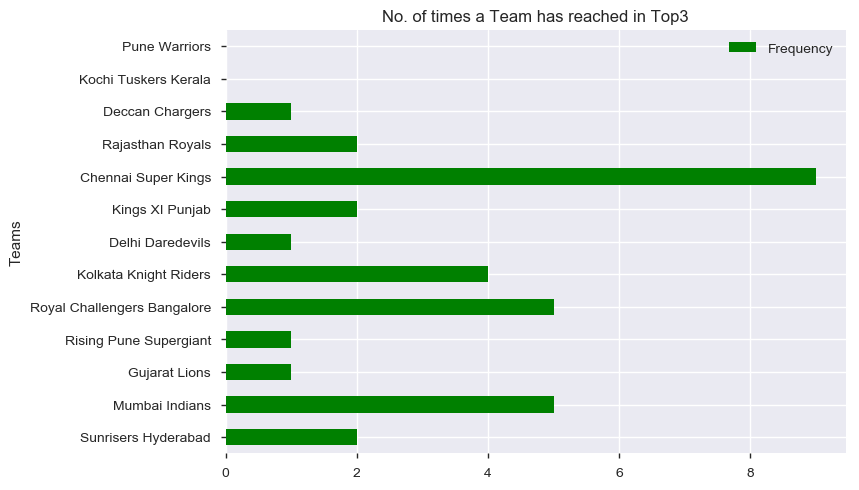

In [536]:
top3 = {'Teams':teams_list, 'Frequency':[0]*len(teams_list)}
for i in range (0,len(teams_list)):
    top3['Frequency'][i] =sesn_finalist_df[sesn_finalist_df.Winner==teams_list[i]].Season.count()+sesn_finalist_df[sesn_finalist_df.RunrsUp1==teams_list[i]].Season.count()+sesn_finalist_df[sesn_finalist_df.RunrsUp2==teams_list[i]].Season.count()
top3_df = pd.DataFrame(data=top3)
top3_df.plot(x='Teams', y='Frequency', kind='barh', title='No. of times a Team has reached in Top3', colormap='ocean')
#comp_vict_ad_df

- The above output shows that __Chennai Super Kings__ has reached in the top 3 spots __9 times__ in the last __11 seasons__, that is, __81%__ success rate.
- After that __Mumbai Indians__ and __Royal Challengers Bangalore__ are there. They have reached __5 times__ in the last __11 seasons__, that is, __45%__ success rate.
- __Kolkata Knight Riders__ is just behind __Mumbai Indians__ and __Royal Challengers Bangalore__ by securing their place in the top 3 spots __4 times__ in the last __11 seasons__, that is, __36%__ success rate.

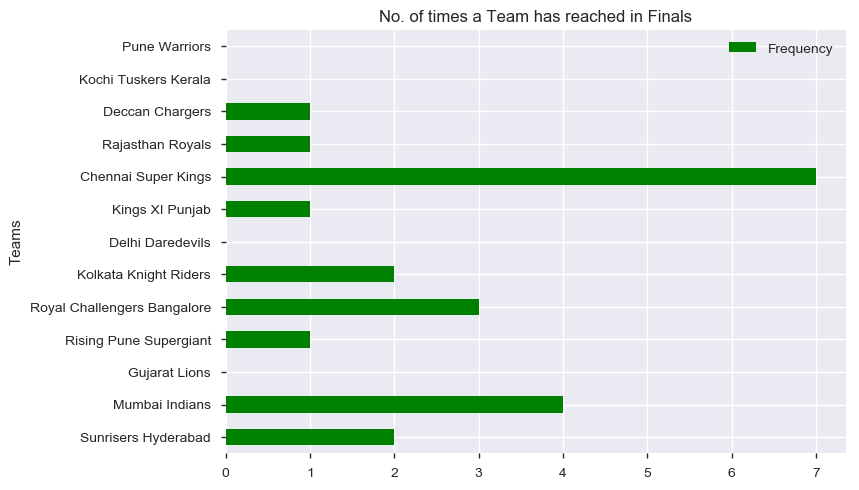

In [537]:
top2 = {'Teams':teams_list, 'Frequency':[0]*len(teams_list)}
for i in range (0,len(teams_list)):
    top2['Frequency'][i] =sesn_finalist_df[sesn_finalist_df.Winner==teams_list[i]].Season.count()+sesn_finalist_df[sesn_finalist_df.RunrsUp1==teams_list[i]].Season.count()
top2_df = pd.DataFrame(data=top2)
top2_df.plot(x='Teams', y='Frequency', kind='barh', title='No. of times a Team has reached in Finals', colormap='ocean')
#comp_vict_ad_df

- The above output shows that __Chennai Super Kings__ has reached in the finals __7 times__ out of the __9 times__ it has reached in the Top 3, that is, __78%__ conversion rate.
- After that __Mumbai Indians__ is there. It has reached __4 times__ in the finals out of the __5 times__ it has reached in the Top 3, that is, __80%__ conversion rate.
- Behind __Mumbai Indians__, __Royal Challengers Bangalore__ has reached in the finals __3 times__ out of the __5 times__ it has reached in the Top 3, that is, __60%__ conversion rate.
- __Kolkata Knight Riders__ has reached in the finals __2 times__ out of the __4 times__ it has reached in the Top 3, that is, __50%__ conversion rate.

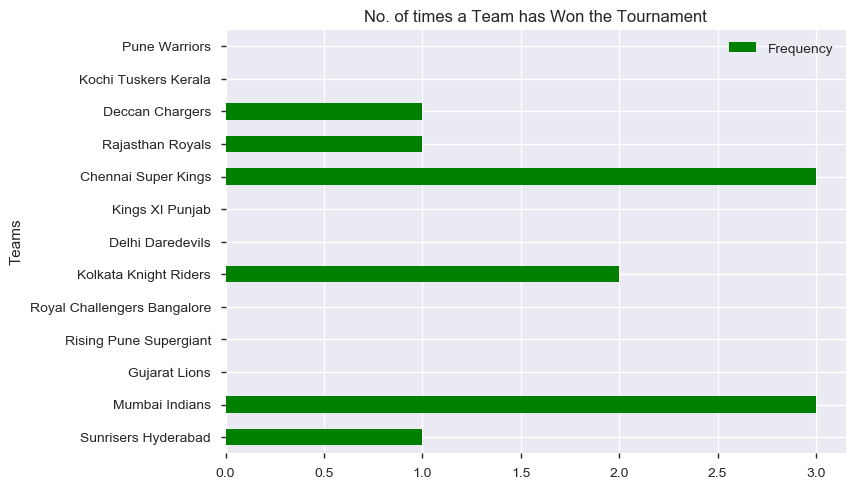

In [538]:
top1 = {'Teams':teams_list, 'Frequency':[0]*len(teams_list)}
for i in range (0,len(teams_list)):
    top1['Frequency'][i] =sesn_finalist_df[sesn_finalist_df.Winner==teams_list[i]].Season.count()
top1_df = pd.DataFrame(data=top1)
top1_df.plot(x='Teams', y='Frequency', kind='barh', title='No. of times a Team has Won the Tournament', colormap='ocean')
#comp_vict_ad_df

- The above output shows that __Chennai Super Kings__ has won the tournament __3 times__ out of the __7 times__ it has reached in the finals, that is, __43%__ conversion rate.
- __Mumbai Indians__ has also won the tournament __3 times__ out of the __4 times__ it has reached in the finals, that is, __75%__ conversion rate.
- __Kolkata Knight Riders__ has won the tournament __2 times__ out of the __2 times__ it has reached in the finals, that is, __100%__ conversion rate.

<a id=section402></a>

### 4.2 What is the Match Winning Percentage of each Team?

Text(0.5, 1.0, 'Matches Won by each Team')

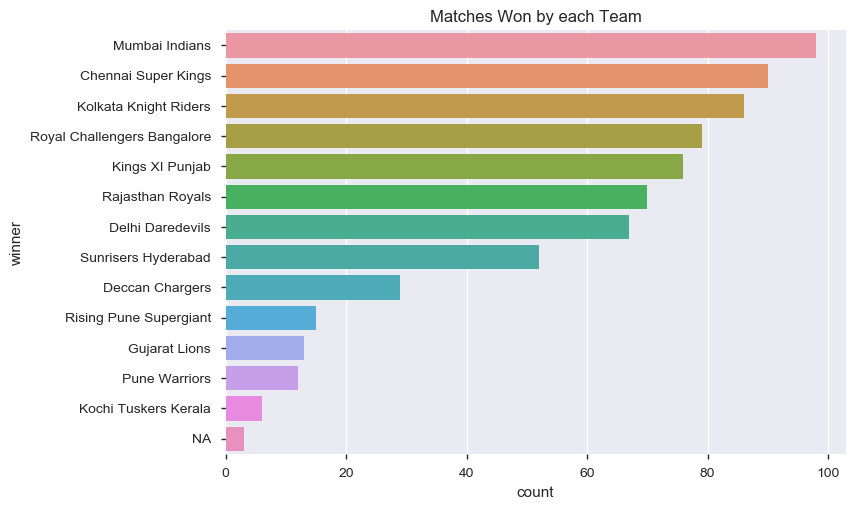

In [539]:
sns.countplot(y='winner', data=matches_data, order=matches_data['winner'].value_counts().index).set_title('Matches Won by each Team')

- The above output shows that __Mumbai Indians__ has __won__ the __maximum__ number of __matches__, close to __100__ matches in the __11 seasons__ that it has played.
- After that __Chennai Super Kings__ has __won__ the __second maximum__ number of __matches__, close to __90__ matches.
- __Kolkata Knight Riders__ has __won__ the __third maximum__ number of __matches__, close to __85__ matches.

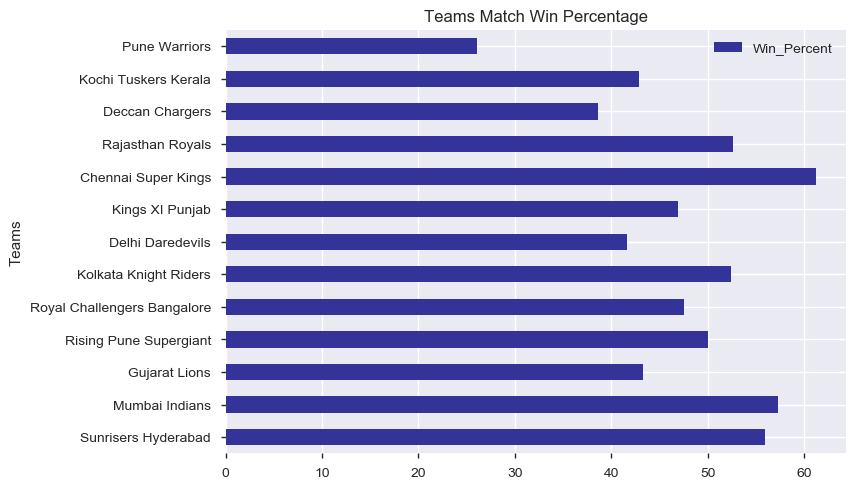

In [540]:
win_percent = {'Teams':teams_list, 'Win_Percent':[0]*len(teams_list)}
for i in range (0,len(teams_list)):
    win_percent['Win_Percent'][i] = ((matches_data[matches_data.winner==teams_list[i]].id.count())/(matches_data[(matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])].id.count()))*100
win_percent_df = pd.DataFrame(data=win_percent)
win_percent_df.plot(x='Teams', y='Win_Percent', kind='barh', title='Teams Match Win Percentage', colormap='terrain')

- The above output shows that __Chennai Super Kings__ has __won 62% (approx.)__ of the matches played by it.
- __Mumbai Indians__ has __won 57% (approx.)__ of the matches played by it.
- __Sunrisers Hyderabad__ has __won 55% (approx.)__ of the matches played by it.
- __Kolkata Knight Riders__ & __Rajasthan Royals__ each have __won 52% (approx.)__ of the matches played by them.
- __Pune Warriors__ has the __least match winning percentage with 25% (approx.)__.

- From the above 2 observations we can see that:<br/>
    - Although __Mumbai Indians__ has won the maximum number of matches in the __11 seasons__ that it has played, its __match winning percentage__ is __57% (approx.)__ second highest after __Chennai Super Kings' 62% (approx.)__.
    - Also, __Sunrisers Hyderabad__ has a better __match winning percentage__ than __Kolkata Knight Riders__ & __Rajasthan Royals__.

<a id=section403></a>

### 4.3 What is the Impact of Toss on the Match Winning Percentage of each Team?

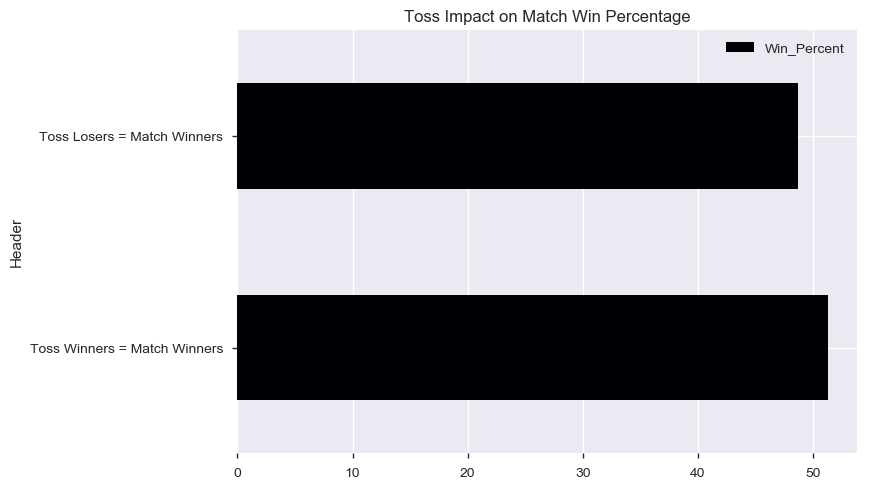

In [541]:
a1 = {'Header':['Toss Winners = Match Winners','Toss Losers = Match Winners'], 'Win_Percent':[0,0]}
a1['Win_Percent'][0] = (matches_data[matches_data.toss_winner==matches_data.winner].id.count()/matches_data.id.count())*100
a1['Win_Percent'][1] = (matches_data[matches_data.toss_winner!=matches_data.winner].id.count()/matches_data.id.count())*100
a1_df = pd.DataFrame(data=a1)
a1_df.plot(x='Header', y='Win_Percent', kind='barh', title='Toss Impact on Match Win Percentage', colormap='inferno')

From the above output we can see that there is a slight advantage to the __Toss Winning Team__ as far as __Winning a Match__ is concerned.

__52% (approx.)__ of the time __Toss Winning Team__ is the __Match Winning Team__.

On a lighter note, the above output also justifies the fact that __tossing a coin__ is an __equally likely event__ and that __winning a match__ actually depends on which Team plays the game better on that day irrespective of who won the toss!! Having said that, __winning a toss__ does help in some sitations and especially in lengthier format of the game but not that much in the 20-20 format!!

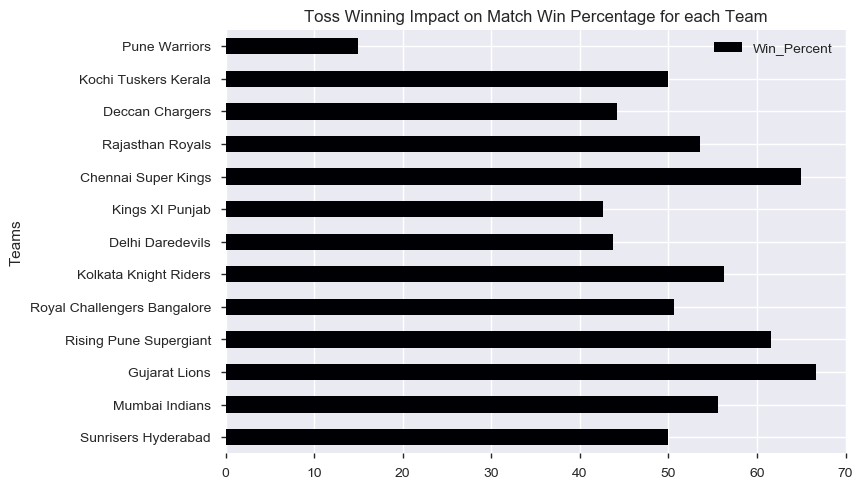

In [542]:
toss_ad1 = {'Teams':teams_list, 'Win_Percent':[0]*len(teams_list)}
for i in range (0,len(teams_list)):
    toss_ad1['Win_Percent'][i] = (matches_data[(matches_data.toss_winner==teams_list[i]) & (matches_data.winner==teams_list[i])].id.count()/matches_data[((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & (matches_data.toss_winner==teams_list[i])].id.count())*100
toss_ad1_df = pd.DataFrame(data=toss_ad1)
toss_ad1_df.plot(x='Teams', y='Win_Percent', kind='barh', title='Toss Winning Impact on Match Win Percentage for each Team', colormap='inferno')

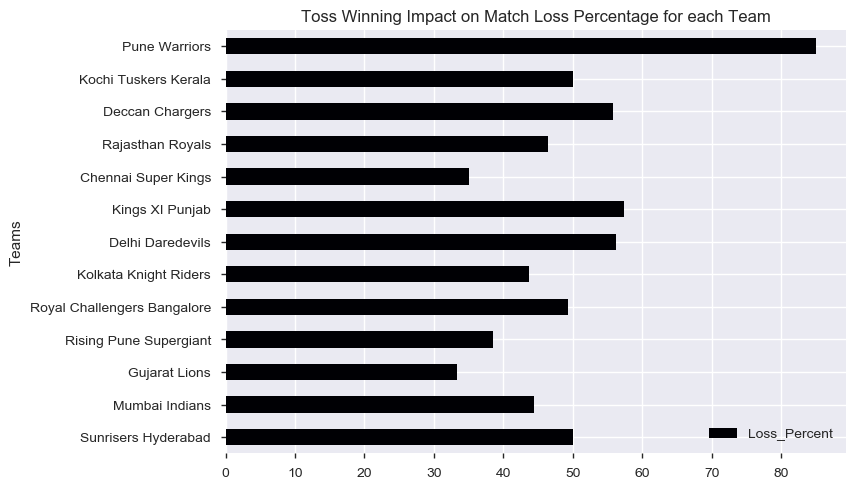

In [543]:
toss_ad3 = {'Teams':teams_list, 'Loss_Percent':[0]*len(teams_list)}
for i in range (0,len(teams_list)):
    toss_ad3['Loss_Percent'][i] = (matches_data[(matches_data.toss_winner==teams_list[i]) & (matches_data.winner!=teams_list[i])].id.count()/matches_data[((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & (matches_data.toss_winner==teams_list[i])].id.count())*100
toss_ad3_df = pd.DataFrame(data=toss_ad3)
toss_ad3_df.plot(x='Teams', y='Loss_Percent', kind='barh', title='Toss Winning Impact on Match Loss Percentage for each Team', colormap='inferno')

- The above 2 outputs are complement of each other. From these 2 outputs we can conclude that:<br/>
    - __Gujarat Lions__ has __won maximum 66% (aaprox.)__ of the matches where it has won the toss.
    - __Chennai Super Kings__ has __won 64% (approx.)__ of the matches where it has won the toss.
    - __Mumbai Indians__ has __won 55% (approx.)__ of the matches where it has won the toss.
    - __Kolkata Knight Riders__ has __won 56% (approx.)__ of the matches where it has won the toss.
    - __Pune Warriors__ has __lost maximum 85% (approx.)__ of the matches where it has won the toss.

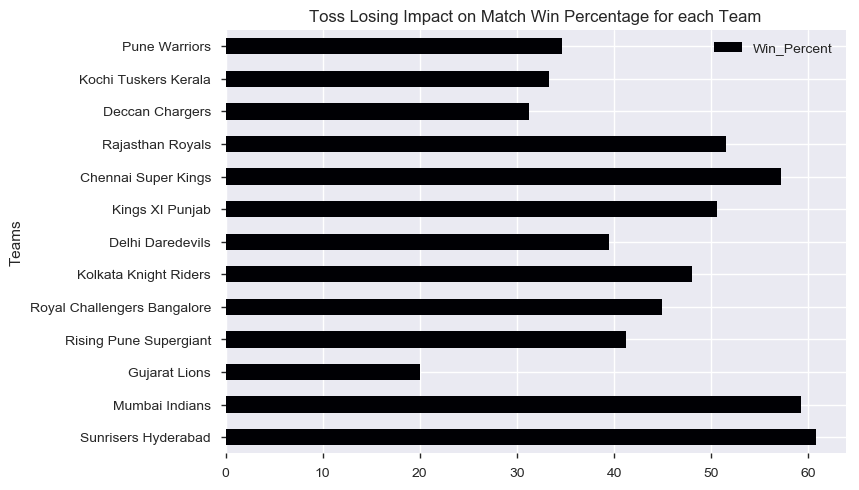

In [544]:
toss_ad2 = {'Teams':teams_list, 'Win_Percent':[0]*len(teams_list)}
for i in range (0,len(teams_list)):
    toss_ad2['Win_Percent'][i] = (matches_data[(matches_data.toss_winner!=teams_list[i]) & (matches_data.winner==teams_list[i])].id.count()/matches_data[((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & (matches_data.toss_winner!=teams_list[i])].id.count())*100
toss_ad2_df = pd.DataFrame(data=toss_ad2)
toss_ad2_df.plot(x='Teams', y='Win_Percent', kind='barh', title='Toss Losing Impact on Match Win Percentage for each Team', colormap='inferno')

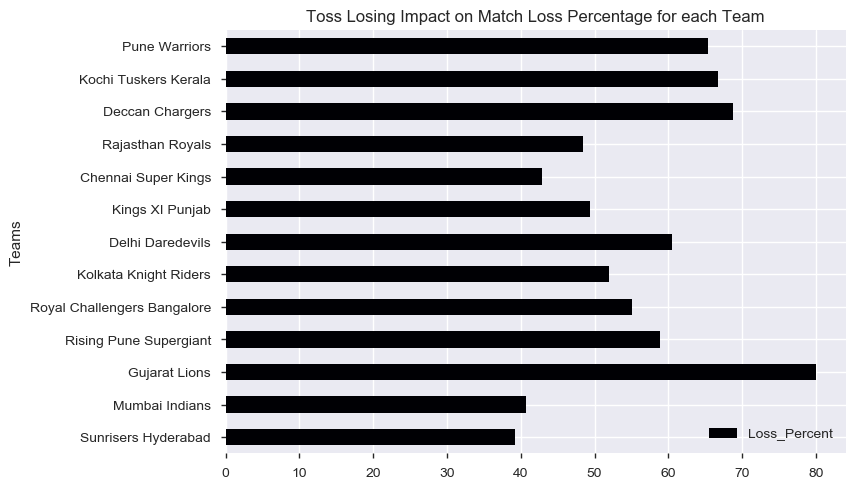

In [545]:
toss_ad4 = {'Teams':teams_list, 'Loss_Percent':[0]*len(teams_list)}
for i in range (0,len(teams_list)):
    toss_ad4['Loss_Percent'][i] = (matches_data[((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & ((matches_data.toss_winner!=teams_list[i]) & (matches_data.winner!=teams_list[i]))].id.count()/matches_data[((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & (matches_data.toss_winner!=teams_list[i])].id.count())*100
toss_ad4_df = pd.DataFrame(data=toss_ad4)
toss_ad4_df.plot(x='Teams', y='Loss_Percent', kind='barh', title='Toss Losing Impact on Match Loss Percentage for each Team', colormap='inferno')

- The above 2 outputs are complement of each other. From these 2 outputs we can conclude that:<br/>
    - __Sunrisers Hyderabad__ has __won maximum 61% (aaprox.)__ of the matches where it has lost the toss.
    - __Mumbai Indians__ has __won 59% (approx.)__ of the matches where it has lost the toss.
    - __Chennai Super Kings__ has __won 57% (approx.)__ of the matches where it has lost the toss.
    - __Kolkata Knight Riders__ has __won 47% (approx.)__ of the matches where it has lost the toss.
    - __Gujarat Lions__ has __lost maximum 80% (approx.)__ of the matches where it has lost the toss.

- From the above 4 outputs we can conclude that:<br/>
    - __Mumbai Indians__ needs to __capitalise more after winning the toss__ as compared to its close competitors __Chennai Super Kings__ and __Kolkata Knight Riders__. __Mumbai Indians__ needs to improve this figure by atleast __10%__.
    - Although, after losing the toss __Mumbai Indians__ has a slightly better track record of __winning the matches__ with respect to its competitors __Chennai Super Kings__ and __Kolkata Knight Riders__, but still it needs to further improve this figure by atleast __6%__.

<a id=section404></a>

### 4.4 What is the Impact of Bat/Field First on the Match Winning Percentage of each Team?

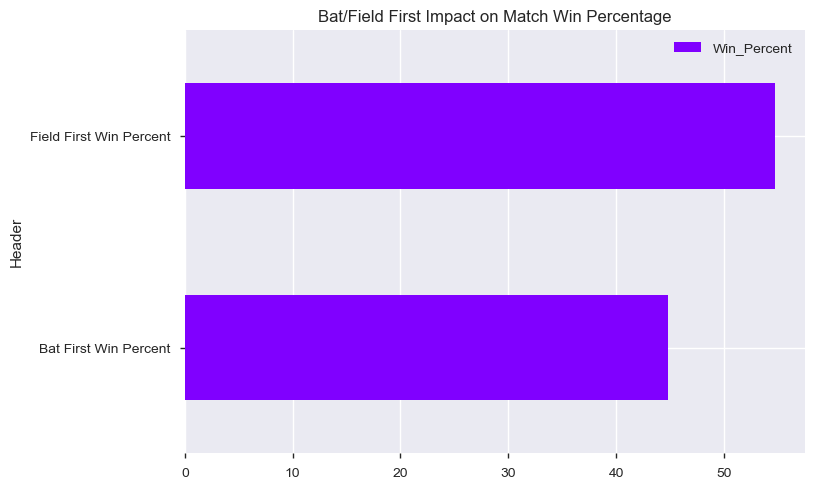

In [546]:
a1 = {'Header':['Bat First Win Percent','Field First Win Percent'], 'Win_Percent':[0,0]}
a1['Win_Percent'][0] = (matches_data[matches_data.bat_first==matches_data.winner].id.count()/matches_data.id.count())*100
a1['Win_Percent'][1] = (matches_data[matches_data.field_first==matches_data.winner].id.count()/matches_data.id.count())*100
a1_df = pd.DataFrame(data=a1)
a1_df.plot(x='Header', y='Win_Percent', kind='barh', title='Bat/Field First Impact on Match Win Percentage', colormap='rainbow')

From the above output we can see that there is advantage to the __Chasing Team__ as far as __Winning a Match__ is concerned.

__55% (approx.)__ of the time __Fielding First Team__ is the __Match Winning Team__.

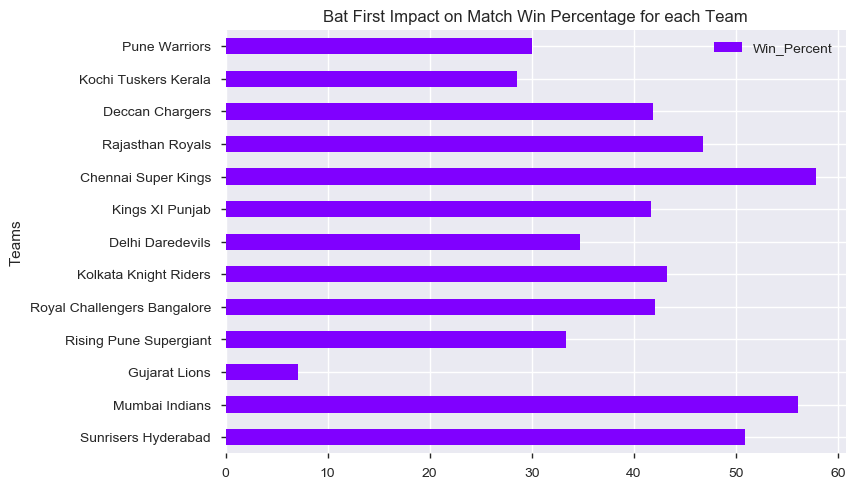

In [547]:
bat_first_ad1 = {'Teams':teams_list, 'Win_Percent':[0]*len(teams_list)}
for i in range (0,len(teams_list)):
    bat_first_ad1['Win_Percent'][i] = (matches_data[((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & ((matches_data.bat_first==teams_list[i]) & (matches_data.winner==teams_list[i]))].id.count()/matches_data[((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & (matches_data.bat_first==teams_list[i])].id.count())*100
bat_first_ad1_df = pd.DataFrame(data=bat_first_ad1)
bat_first_ad1_df.plot(x='Teams', y='Win_Percent', kind='barh', title='Bat First Impact on Match Win Percentage for each Team', colormap='rainbow')

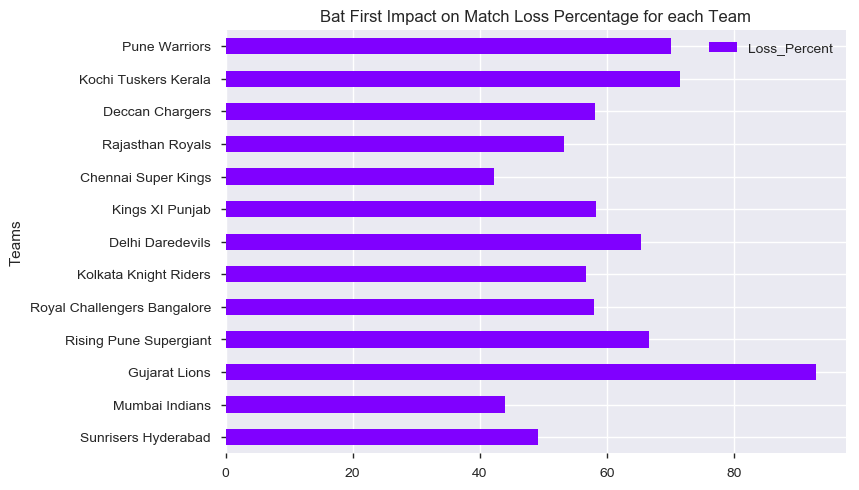

In [548]:
bat_first_ad2 = {'Teams':teams_list, 'Loss_Percent':[0]*len(teams_list)}
for i in range (0,len(teams_list)):
    bat_first_ad2['Loss_Percent'][i] = (matches_data[((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & ((matches_data.bat_first==teams_list[i]) & (matches_data.winner!=teams_list[i]))].id.count()/matches_data[((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & (matches_data.bat_first==teams_list[i])].id.count())*100
bat_first_ad2_df = pd.DataFrame(data=bat_first_ad2)
bat_first_ad2_df.plot(x='Teams', y='Loss_Percent', kind='barh', title='Bat First Impact on Match Loss Percentage for each Team', colormap='rainbow')

- The above 2 outputs are complement of each other. From these 2 outputs we can conclude that:<br/>
    - __Chennai Super Kings__ has __won maximum 57% (aaprox.)__ of the matches where it has batted first.
    - __Mumbai Indians__ has __won 55% (approx.)__ of the matches where it has batted first.
    - __Sunrisers Hyderabad__ has __won 51% (approx.)__ of the matches where it has batted first.
    - __Gujarat Lions__ has __lost maximum 93% (approx.)__ of the matches where it has batted first.
    - __Kolkata Knight Riders__ has __lost 57% (approx.)__ of the matches where it has batted first.

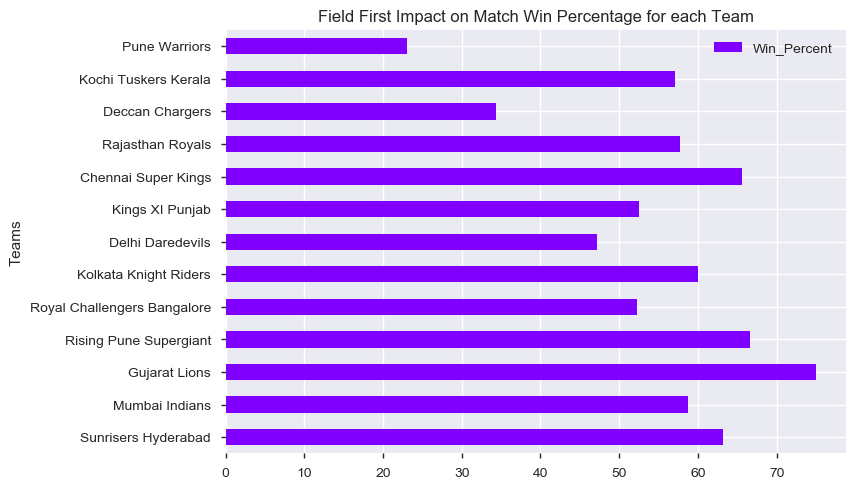

In [549]:
field_first_ad1 = {'Teams':teams_list, 'Win_Percent':[0]*len(teams_list)}
for i in range (0,len(teams_list)):
    field_first_ad1['Win_Percent'][i] = (matches_data[((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & ((matches_data.field_first==teams_list[i]) & (matches_data.winner==teams_list[i]))].id.count()/matches_data[((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & (matches_data.field_first==teams_list[i])].id.count())*100
field_first_ad1_df = pd.DataFrame(data=field_first_ad1)
field_first_ad1_df.plot(x='Teams', y='Win_Percent', kind='barh', title='Field First Impact on Match Win Percentage for each Team', colormap='rainbow')

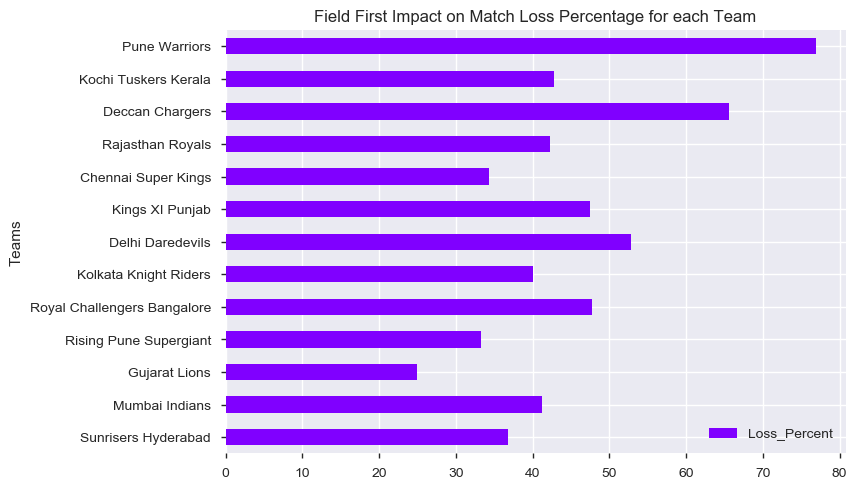

In [550]:
field_first_ad2 = {'Teams':teams_list, 'Loss_Percent':[0]*len(teams_list)}
for i in range (0,len(teams_list)):
    field_first_ad2['Loss_Percent'][i] = (matches_data[((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & ((matches_data.field_first==teams_list[i]) & (matches_data.winner!=teams_list[i]))].id.count()/matches_data[((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & (matches_data.field_first==teams_list[i])].id.count())*100
field_first_ad2_df = pd.DataFrame(data=field_first_ad2)
field_first_ad2_df.plot(x='Teams', y='Loss_Percent', kind='barh', title='Field First Impact on Match Loss Percentage for each Team', colormap='rainbow')

- The above 2 outputs are complement of each other. From these 2 outputs we can conclude that:<br/>
    - __Gujarat Lions__ has __won maximum 75% (aaprox.)__ of the matches where it has fielded first.
    - __Chennai Super Kings__ has __won 65% (approx.)__ of the matches where it has fielded first.
    - __Mumbai Indians__ has __won 59% (approx.)__ of the matches where it has fielded first.
    - __Kolkata Knight Riders__ has __won 60% (approx.)__ of the matches where it has fielded first.
    - __Pune Warriors__ has __lost maximum 76% (approx.)__ of the matches where it has fielded first.

- From the above 4 outputs we can conclude that:<br/>
    - __Mumbai Indians__ has a decent record __while batting first__ as compared to its close competitor __Chennai Super Kings__. __Mumbai Indians__ can improve this figure by around __10%__ to balance out with __fielding first record__.
    - __Mumbai Indians__ is lagging behind in the __fielding first statistic__. It ranks 6th in this aspect. With respect to its competitors __Chennai Super Kings__ and __Kolkata Knight Riders__ it is short of __6%__ & __1%__ respectively. But from the winner of this category it is well short of __16%__. So, __Mumbai Indians__ needs to improve in this area by atleast __6%__ to put forth a strong challenge for other teams.

<a id=section405></a>

### 4.5 What is the Impact of Playing at Home Venue & at Away Locations on the Match Winning Percentage of each Team?

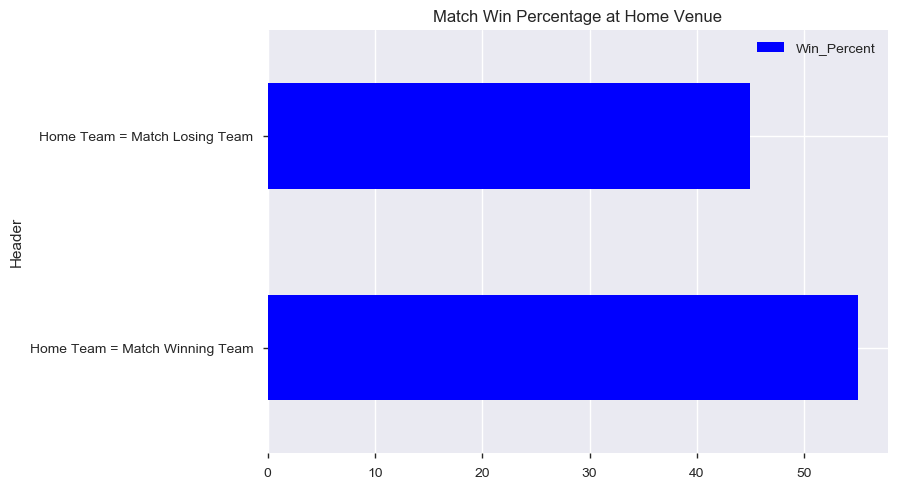

In [551]:
a1 = {'Header':['Home Team = Match Winning Team','Home Team = Match Losing Team'], 'Win_Percent':[0,0]}
a1['Win_Percent'][0] = (matches_data[matches_data.home_team==matches_data.winner].id.count()/matches_data[(matches_data.team1==matches_data.home_team) | (matches_data.team2==matches_data.home_team)].id.count())*100
a1['Win_Percent'][1] = (matches_data[((matches_data.team1==matches_data.home_team) | (matches_data.team2==matches_data.home_team)) & (matches_data.home_team!=matches_data.winner)].id.count()/matches_data[(matches_data.team1==matches_data.home_team) | (matches_data.team2==matches_data.home_team)].id.count())*100
a1_df = pd.DataFrame(data=a1)
a1_df.plot(x='Header', y='Win_Percent', kind='barh', title='Match Win Percentage at Home Venue', colormap='brg')

From the above output we can see that there is advantage to the __Home Team__ as far as __Winning a Match__ is concerned.

__55% (approx.)__ of the time __Home Team__ is the __Match Winning Team__.

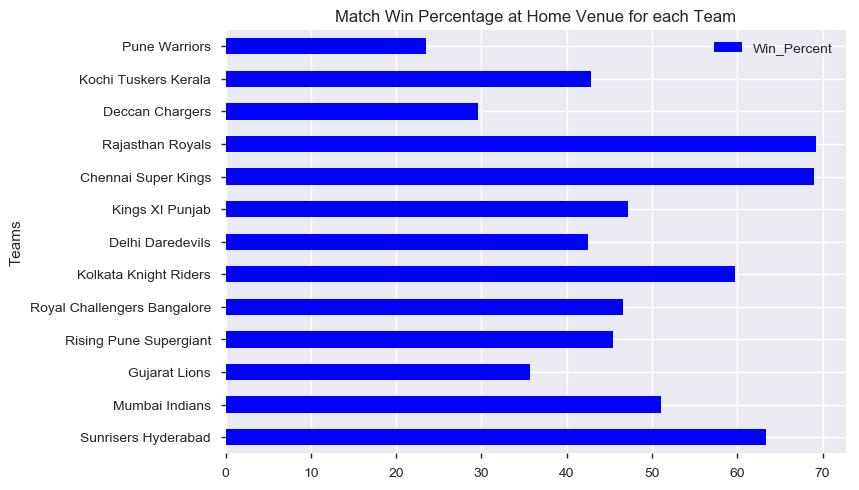

In [552]:
home_team_ad = {'Teams':teams_list, 'Win_Percent':[0]*len(teams_list)}
for i in range (0,len(teams_list)):
    home_team_ad['Win_Percent'][i] = (matches_data[(matches_data.home_team==teams_list[i]) & (matches_data.winner==teams_list[i])].id.count()/matches_data[matches_data.home_team==teams_list[i]].id.count())*100
home_team_ad_df = pd.DataFrame(data=home_team_ad)
home_team_ad_df.plot(x='Teams', y='Win_Percent', kind='barh', title='Match Win Percentage at Home Venue for each Team', colormap='brg')


- From the above output we can conclude that:<br/>
    - __Rajasthan Royals__ has __won maximum 69% (aaprox.)__ of the matches while playing at home venue.
    - __Chennai Super Kings__ has __won 68% (approx.)__ of the matches while playing at home venue.
    - __Mumbai Indians__ has __won 51% (approx.)__ of the matches while playing at home venue.
    - __Kolkata Knight Riders__ has __won 60% (approx.)__ of the matches while playing at home venue.
    - __Pune Warriors__ has __least winning percentage__ at home with __24% (approx.)__.

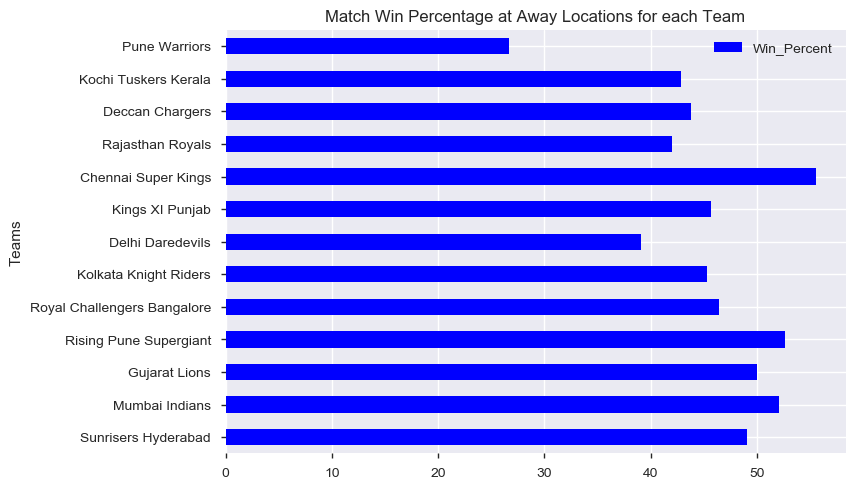

In [553]:
home_team_ad1 = {'Teams':teams_list, 'Win_Percent':[0]*len(teams_list)}
for i in range (0,len(teams_list)):
    home_team_ad1['Win_Percent'][i] = (matches_data[(matches_data.home_team!=teams_list[i]) & (matches_data.winner==teams_list[i])].id.count()/matches_data[((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & (matches_data.home_team!=teams_list[i])].id.count())*100
home_team_ad1_df = pd.DataFrame(data=home_team_ad1)
home_team_ad1_df.plot(x='Teams', y='Win_Percent', kind='barh', title='Match Win Percentage at Away Locations for each Team', colormap='brg')


- From the above output we can conclude that:<br/>
    - __Chennai Super Kings__ has __won maximum 56% (aaprox.)__ of the matches while playing away from home venue.
    - __Mumbai Indians__ has __won 52% (approx.)__ of the matches while playing away from home venue.
    - __Kolkata Knight Riders__ has __won 45% (approx.)__ of the matches while playing away from home venue.
    - __Pune Warriors__ has __least winning percentage__ away from home with __26% (approx.)__.

- From the above 2 outputs we can conclude that:<br/>
    - __Chennai Super Kings__ has an excellent record both at __home venue__ and __away from home venue__ as well.
    - __Kolkata Knight Riders__ has better record at __home venue__ but is struggling a bit at __away from home venues__.
    - __Mumbai Indians__ needs to improve its performance at __home venue__ by atleast __10%__. __Away from home__ it has performed better but can further improve by __5% - 7%__.

<a id=section406></a>

### 4.6 How each Team has Performed Season-Wise?

In [554]:
sesn_corr = {'Seasons': sesn_set, teams_list[0]: [0]*len(sesn_set), 
              teams_list[1]: [0]*len(sesn_set), teams_list[2]: [0]*len(sesn_set), 
              teams_list[3]: [0]*len(sesn_set), teams_list[4]: [0]*len(sesn_set), 
              teams_list[5]: [0]*len(sesn_set), teams_list[6]: [0]*len(sesn_set), 
              teams_list[7]: [0]*len(sesn_set), teams_list[8]: [0]*len(sesn_set), 
              teams_list[9]: [0]*len(sesn_set), teams_list[10]: [0]*len(sesn_set), 
              teams_list[11]: [0]*len(sesn_set), teams_list[12]: [0]*len(sesn_set)}
for i in range (0,len(teams_list)):
    for j in range (0,len(sesn_set)):
        if not (matches_data[(((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & (matches_data.season==sesn_set[j])) & (matches_data.winner==teams_list[i])].id.empty):
            sesn_corr[teams_list[i]][j] = math.ceil((matches_data[(((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & (matches_data.season==sesn_set[j])) & (matches_data.winner==teams_list[i])].id.count()/matches_data[((matches_data.team1==teams_list[i]) | (matches_data.team2==teams_list[i])) & (matches_data.season==sesn_set[j])].id.count())*100)
        else:
            sesn_corr[teams_list[i]][j] = 0
            
sesn_corr_df = pd.DataFrame(data=sesn_corr)

Text(0.5, 1.0, 'Match Winning Percentage of Teams in Columns in Different Seasons in Rows')

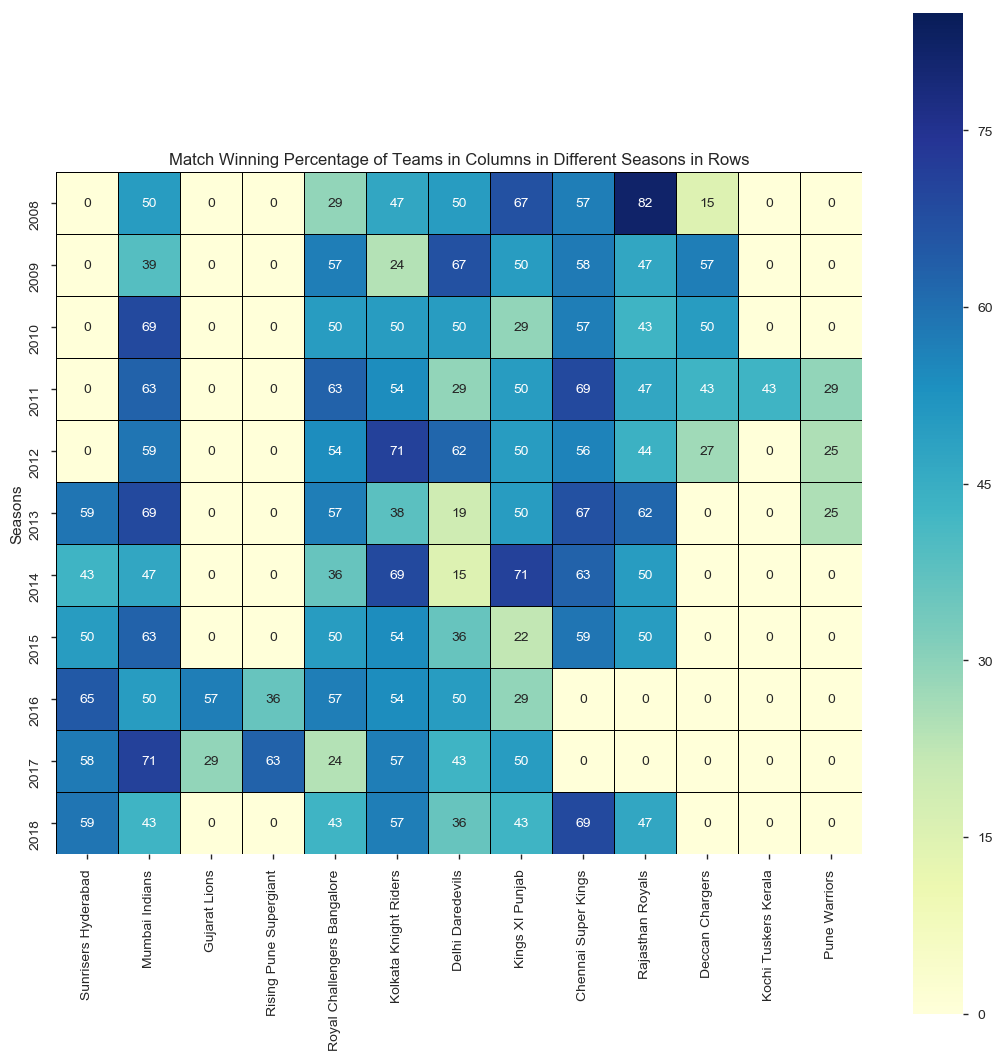

In [555]:
c4 = sesn_corr_df.set_index('Seasons')
plt.figure(figsize=(13,13))
sns.heatmap(c4,vmax=85,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Match Winning Percentage of Teams in Columns in Different Seasons in Rows')

- From the above output we can observe the following:<br/>
    - Overall, the __highest Match Winning Percentage 82%__ is registered by __Rajasthan Royals__ in __2008__.
    - __Mumbai Indians__ has had __5 good seasons__ with __Match Winning Percentage__ over __60%__ and __3 peak seasons__ with __Match Winning Percentage__ close to __70%__.
    - __Chennai Super Kings__ has had __4 good seasons__ with __Match Winning Percentage__ over __60%__ and __3 peak seasons__ with __Match Winning Percentage__ close to __70%__. Also, it has not played in __2 seasons__.
    - __Kolkata Knight Riders__ has had __2 good seasons__ with __Match Winning Percentage__ over __60%__ and __1 peak season__ with __Match Winning Percentage__ over __70%__.
    - Also, we can observe that out of 13 Teams __only 5 Teams__ have played all the 11 Seasons. Out of these __5 Teams__, __Delhi Daredevils__ has the weakest performance with __Match Winning Percentage__ less than __50%__ __6 times__.

<a id=section407></a>

### 4.7 Which Team has Won their Matches Comprehensively?

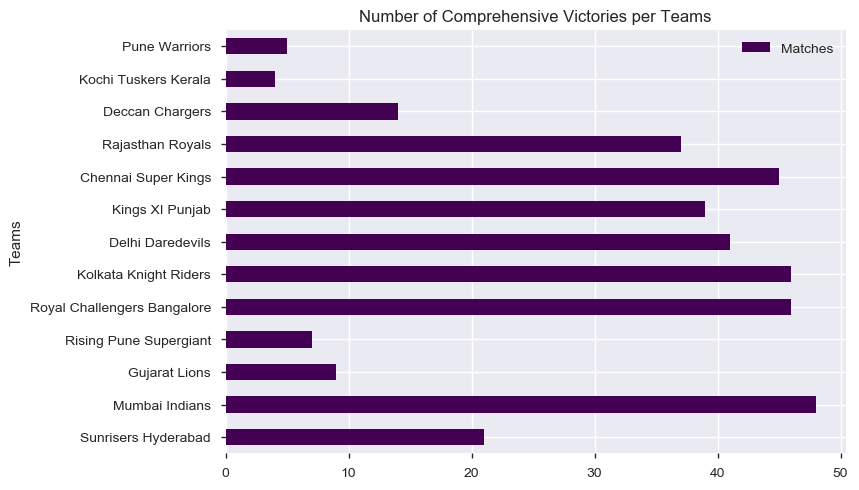

In [556]:
comp_vict_ad2 = {'Teams':teams_list, 'Matches':[0]*len(teams_list)}
for i in range (0,len(teams_list)):
    comp_vict_ad2['Matches'][i] = matches_data[(matches_data.winner==teams_list[i]) & (matches_data.comp_vict!=0)].comp_vict.count()
comp_vict_ad2_df = pd.DataFrame(data=comp_vict_ad2)
comp_vict_ad2_df.plot(x='Teams', y='Matches', kind='barh', title='Number of Comprehensive Victories per Teams', colormap='viridis')
#comp_vict_ad_df

- From the above output we can observe the following:<br/>
    - __Mumbai Indians__ has __won the maximum__ number of matches comprehensively, __47 matches (approx.)__.
    - __Kolkata Knight Riders__ and __Royal Challengers Bangalore__ have __won__ __45 matches each comprehensively__.
    - __Chennai Super Kings__ has __won 44 matches comprehensively__.

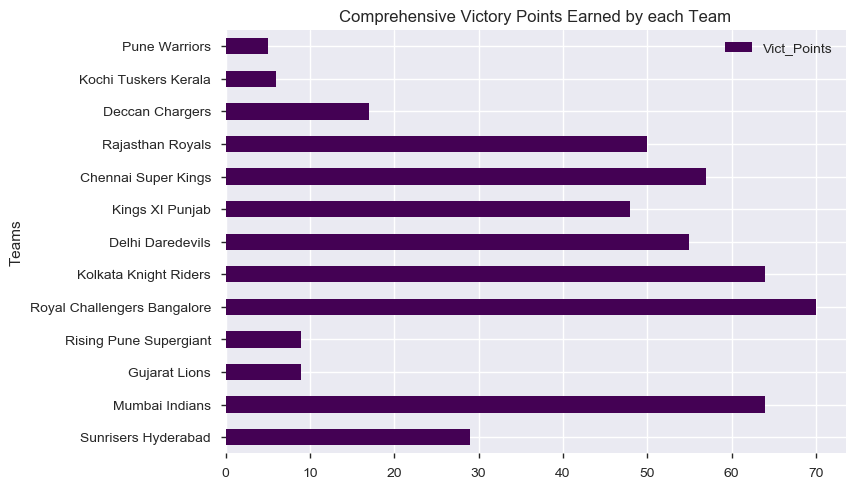

In [557]:
comp_vict_ad1 = {'Teams':teams_list, 'Vict_Points':[0]*len(teams_list)}
for i in range (0,len(teams_list)):
    comp_vict_ad1['Vict_Points'][i] = matches_data[(matches_data.winner==teams_list[i]) & (matches_data.comp_vict!=0)].comp_vict.sum()
comp_vict_ad1_df = pd.DataFrame(data=comp_vict_ad1)
comp_vict_ad1_df.plot(x='Teams', y='Vict_Points', kind='barh', title='Comprehensive Victory Points Earned by each Team', colormap='viridis')
#comp_vict_ad_df

- From the above output we can observe the following:<br/>
    - Although __Mumbai Indians__ has __won the maximum__ number of matches comprehensively (__47 matches (approx.)__), __Royal Challengers Bangalore__ has the __highest Comprehensive Victory Points (70)__ which implies that __Royal Challengers Bangalore__ has won their matches by greater margin than __Mumbai Indians__.
    - __Kolkata Knight Riders__ and __Mumbai Indians__ have __64 Comprehensive Victory Points each__.
    - __Chennai Super Kings__ has __57 Comprehensive Victory Points__.

<a id=section408></a>

### 4.8 How the Teams have Performed when they have Played against each other?

In [558]:
teams_corr = {'Teams': teams_list, teams_list[0]: [0]*len(teams_list), 
              teams_list[1]: [0]*len(teams_list), teams_list[2]: [0]*len(teams_list), 
              teams_list[3]: [0]*len(teams_list), teams_list[4]: [0]*len(teams_list), 
              teams_list[5]: [0]*len(teams_list), teams_list[6]: [0]*len(teams_list), 
              teams_list[7]: [0]*len(teams_list), teams_list[8]: [0]*len(teams_list), 
              teams_list[9]: [0]*len(teams_list), teams_list[10]: [0]*len(teams_list), 
              teams_list[11]: [0]*len(teams_list), teams_list[12]: [0]*len(teams_list)}
for i in range (0,len(teams_list)):
    for j in range (0,len(teams_list)):
        if (teams_list[j]!=teams_list[i]):
            if not (matches_data[((matches_data.team1==teams_list[j]) & (matches_data.team2==teams_list[i])) | ((matches_data.team2==teams_list[j]) & (matches_data.team1==teams_list[i]))].id.empty):
                teams_corr[teams_list[i]][j] = math.ceil((matches_data[(((matches_data.team1==teams_list[j]) & (matches_data.team2==teams_list[i])) | ((matches_data.team2==teams_list[j]) & (matches_data.team1==teams_list[i]))) & (matches_data.winner==teams_list[j])].id.count()/matches_data[((matches_data.team1==teams_list[j]) & (matches_data.team2==teams_list[i])) | ((matches_data.team2==teams_list[j]) & (matches_data.team1==teams_list[i]))].id.count())*100)
            else:
                teams_corr[teams_list[i]][j] = 0
        else:
            teams_corr[teams_list[i]][j] = 0
            
teams_corr_df = pd.DataFrame(data=teams_corr)

Text(0.5, 1.0, 'Match Win Percentage of Teams in Rows when Played against the Teams in Columns')

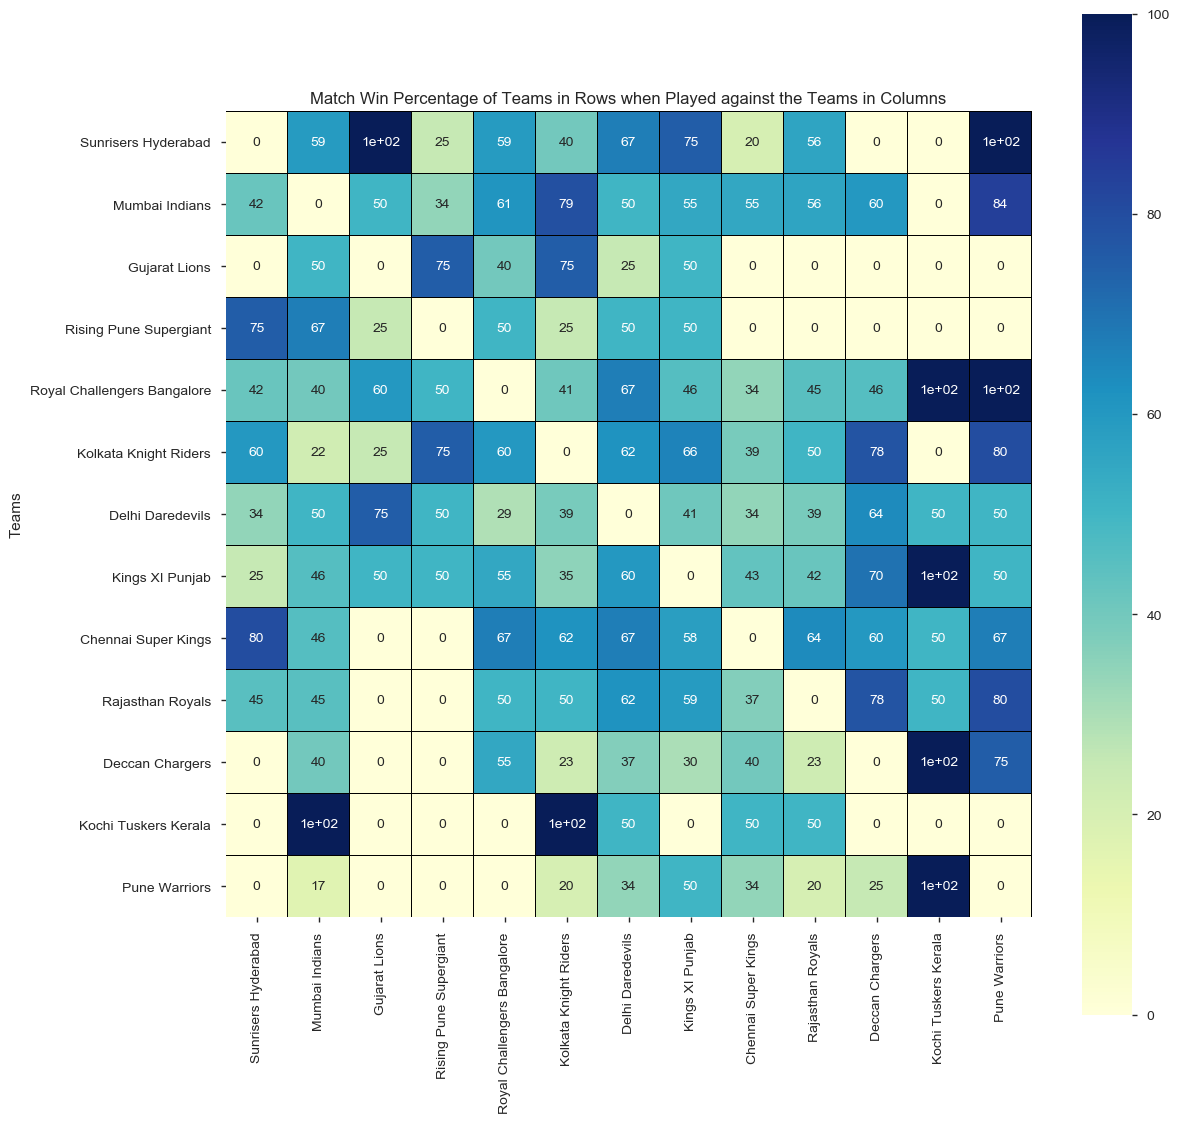

In [559]:
c1 = teams_corr_df.set_index('Teams')
plt.figure(figsize=(13,13))
sns.heatmap(c1,vmax=100,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Match Win Percentage of Teams in Rows when Played against the Teams in Columns')

- From the above output we can observe the following:<br/>
    - __Chennai Super Kings__ has more balanced performance (__Match Win Percentage__ around __60%__) against each and every team except against __Mumbai Indians__ & __Kochi Tuskers Kerala__(__Match Win Percentage__ less than __50%__).
    - __Mumbai Indians__ has __Match Win Percentage__ more than __60%__ only against __4 teams__. Against __Sunrisers Hyderabad__ the __Match Win Percentage__ is only __42%__ and against __Kochi Tuskers Kerala__ not even won a single match.
    - __Kolkata Knight Riders__ also has a balanced performance (__Match Win Percentage__ around __60%__) against most of the teams but struggles against __Mumbai Indians, Chennai Super Kings, Gujarat Lions & Kochi Tuskers Kerala__.
    - Few teams have __100% Match Win Percentage__ against few other teams. Ex.: __Royal Challengers Bangalore__ has not lost a single match against __Kochi Tuskers Kerala & Pune Warriors__.

<a id=section409></a>

### 4.9 What is the Match Winning Percentage of Teams on each Day of the Week?

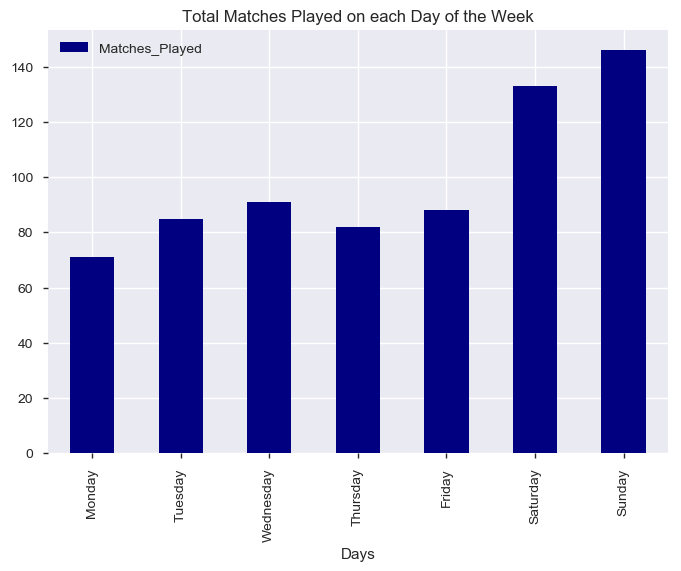

In [560]:
day_set = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
match_day = {'Days': day_set, 'Matches_Played': [0]*len(day_set)}
for i in range (0,len(day_set)):
    if not (matches_data[matches_data.date.dt.weekday_name==day_set[i]].id.empty):
        match_day['Matches_Played'][i] = matches_data[matches_data.date.dt.weekday_name==day_set[i]].id.count()
    else:
        match_day['Matches_Played'][i] = 0
match_day_df = pd.DataFrame(data=match_day)
match_day_df.plot(x='Days', y='Matches_Played', kind='bar', title='Total Matches Played on each Day of the Week', colormap='jet')

- From the above output we can observe the following:<br/>
    - __Maximum__ number of matches have been played on the __weekends__ and that too on __Sundays__.
    - On weekdays, maximum number of matches have been played on __Wednesdays__.

In [561]:
days_corr = {'Teams': teams_list, day_set[0]: [0]*len(teams_list), 
              day_set[1]: [0]*len(teams_list), day_set[2]: [0]*len(teams_list), 
              day_set[3]: [0]*len(teams_list), day_set[4]: [0]*len(teams_list), 
              day_set[5]: [0]*len(teams_list), day_set[6]: [0]*len(teams_list)}
for i in range (0,len(day_set)):
    for j in range (0,len(teams_list)):
        if not (matches_data[(matches_data.winner==teams_list[j]) & (matches_data.date.dt.weekday_name==day_set[i])].id.empty):
            days_corr[day_set[i]][j] = math.ceil((matches_data[(matches_data.winner==teams_list[j]) & (matches_data.date.dt.weekday_name==day_set[i])].id.count()/matches_data[((matches_data.team1==teams_list[j]) | (matches_data.team2==teams_list[j])) & (matches_data.date.dt.weekday_name==day_set[i])].id.count())*100)
        else:
            days_corr[day_set[i]][j] = 0
            
days_corr_df = pd.DataFrame(data=days_corr)

Text(0.5, 1.0, 'Match Winning Percentage of Teams in Rows on each Day in Columns')

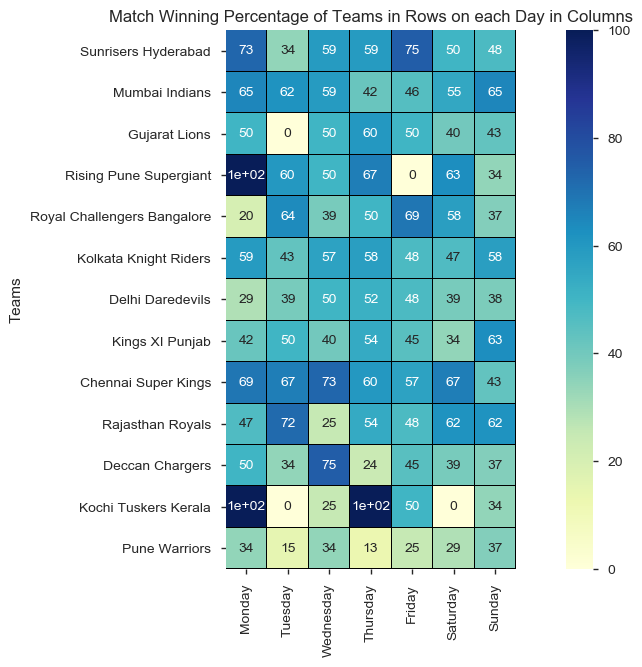

In [562]:
c2 = days_corr_df.set_index('Teams')
plt.figure(figsize=(13,7))
sns.heatmap(c2,vmax=100,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Match Winning Percentage of Teams in Rows on each Day in Columns')

- From the above output we can observe the following:<br/>
    - __Chennai Super Kings__ has a very balanced __Match Win Percentage around 60%__ on each day of the week except on __Sundays__.
    - __Mumbai Indians__ has won __less than 50%__ of the matches on __Thursdays & Fridays__.
    - __Kolkata Knight Riders__ has lost __more than 50%__ of the matches on __Tuesdays, Fridays & Saturdays__.
    - __Rising Pune Supergiant__ has never lost a match on __Mondays__ and never won a match on __Fridays__.
    - Similarly, __Kochi Tuskers Kerala__ has never lost a match on __Mondays & Thursdays__ and never won a match on __Tuesdays & Saturdays__.

<a id=section410></a>

### 4.10 What is the Match Winning Percentage of Teams in each City?

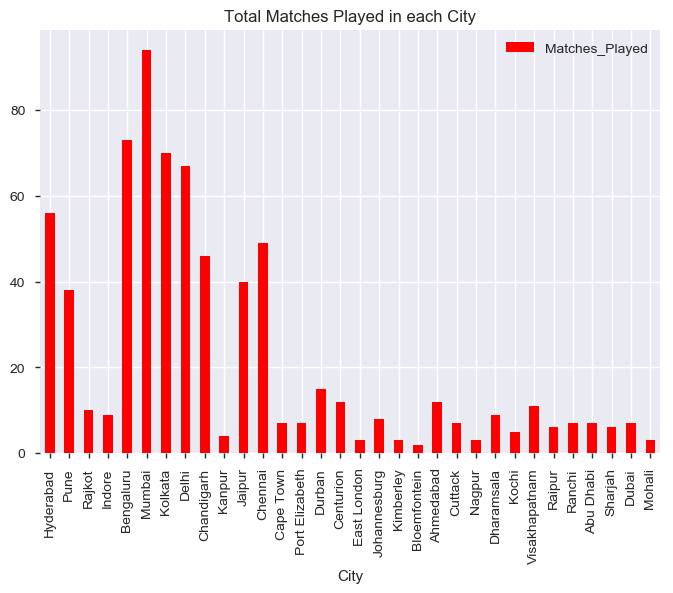

In [563]:
match_city = {'City': city_set, 'Matches_Played': [0]*len(city_set)}
for i in range (0,len(city_set)):
    if not (matches_data[matches_data.city==city_set[i]].id.empty):
        match_city['Matches_Played'][i] = matches_data[matches_data.city==city_set[i]].id.count()
    else:
        match_city['Matches_Played'][i] = 0
match_city_df = pd.DataFrame(data=match_city)
match_city_df.plot(x='City', y='Matches_Played', kind='bar', title='Total Matches Played in each City', colormap='prism')

From the above output we can see that only __9 cities__ have hosted __more than 20 matches in the 11 seasons__, so we will be focussing on the winning percentage of each team in these 9 cities.

In [564]:
maj_city_set = list(match_city_df[match_city_df.Matches_Played>20].City)
city_corr = {'Teams': teams_list, maj_city_set[0]: [0]*len(teams_list), 
              maj_city_set[1]: [0]*len(teams_list), maj_city_set[2]: [0]*len(teams_list), 
              maj_city_set[3]: [0]*len(teams_list), maj_city_set[4]: [0]*len(teams_list), 
              maj_city_set[5]: [0]*len(teams_list), maj_city_set[6]: [0]*len(teams_list),
              maj_city_set[7]: [0]*len(teams_list), maj_city_set[8]: [0]*len(teams_list)}
for i in range (0,len(maj_city_set)):
    for j in range (0,len(teams_list)):
        if not (matches_data[(matches_data.winner==teams_list[j]) & (matches_data.city==maj_city_set[i])].id.empty):
            city_corr[maj_city_set[i]][j] = math.ceil((matches_data[(matches_data.winner==teams_list[j]) & (matches_data.city==maj_city_set[i])].id.count()/matches_data[((matches_data.team1==teams_list[j]) | (matches_data.team2==teams_list[j])) & (matches_data.city==maj_city_set[i])].id.count())*100)
        else:
            city_corr[maj_city_set[i]][j] = 0
            
city_corr_df = pd.DataFrame(data=city_corr)

Text(0.5, 1.0, 'Match Winning Percentage of Teams in Rows in each City in Columns')

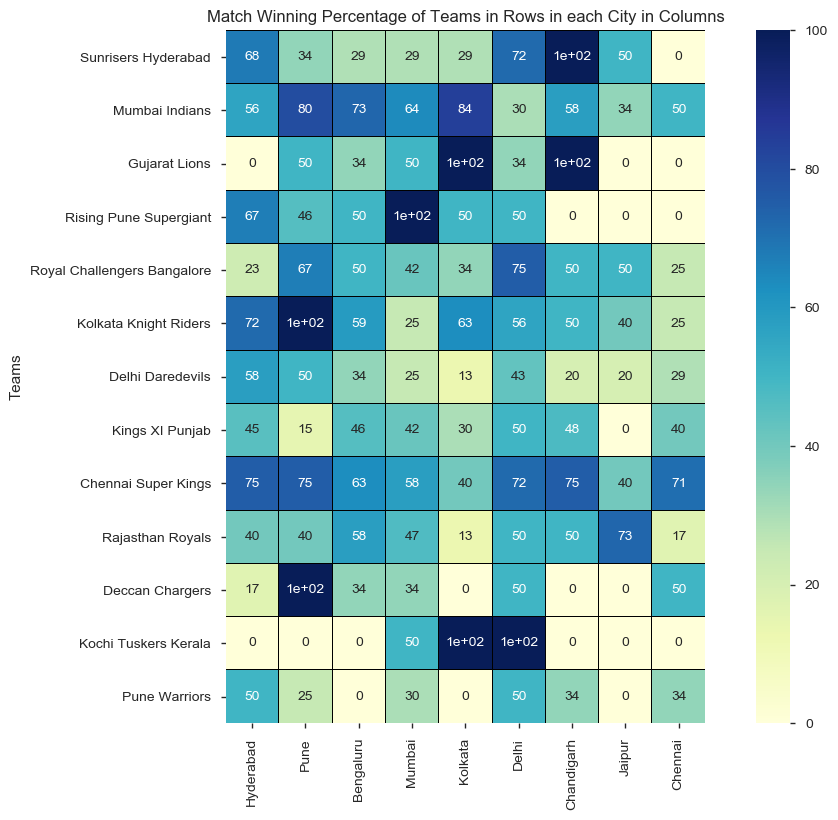

In [565]:
c3 = city_corr_df.set_index('Teams')
plt.figure(figsize=(13,9))
sns.heatmap(c3,vmax=100,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Match Winning Percentage of Teams in Rows in each City in Columns')

- From the above output we can observe the following:<br/>
    - __Chennai Super Kings__ again has a very balanced __Match Win Percentage around 60%__ in each of the cities except in __Kolkata & Jaipur__.
    - __Mumbai Indians__ has won __less than 50%__ of the matches in __Delhi, Jaipur & Chennai__.
    - __Kolkata Knight Riders__ has lost __more than 50%__ of the matches in __Mumbai, Chandigarh, Jaipur & Chennai__.
    - Few teams have not lost a single match in few of the cities. Ex.: __Kochi Tuskers Kerala__ has never lost a match in __Kolkata & Delhi__.

<a id=section5></a>

## 5. Conclusions

- __Mumbai Indians__ needs to __capitalise more after winning the toss__ as compared to its close competitors __Chennai Super Kings__ and __Kolkata Knight Riders__. __Mumbai Indians__ needs to improve this figure by atleast __10%__.
- Although, after losing the toss __Mumbai Indians__ has a slightly better track record of __winning the matches__ with respect to its competitors __Chennai Super Kings__ and __Kolkata Knight Riders__, but still it needs to further improve this figure by atleast __6%__.
- __Mumbai Indians__ has a decent record __while batting first__ as compared to its close competitor __Chennai Super Kings__. __Mumbai Indians__ can improve this figure by around __10%__ to balance out with __fielding first record__.
- __Mumbai Indians__ is lagging behind in the __fielding first statistic__. It ranks 6th in this aspect. With respect to its competitors __Chennai Super Kings__ and __Kolkata Knight Riders__ it is short of __6%__ & __1%__ respectively. But from the winner of this category it is well short of __16%__. So, __Mumbai Indians__ needs to improve in this area by atleast __6%__ to put forth a strong challenge for other teams.
- __Mumbai Indians__ needs to improve its performance at __home venue__ by atleast __10%__. __Away from home__ it has performed better but can further improve by __5% - 7%__.
- __Mumbai Indians__ has had __5 good seasons__ with __Match Winning Percentage__ over __60%__ and __3 peak seasons__ with __Match Winning Percentage__ close to __70%__.
- __Mumbai Indians__ needs to improve their __Match Win Percentage__ in __Delhi, Jaipur & Chennai__.
- __Mumbai Indians__ needs to improve their __Match Win Percentage__ against __Sunrisers Hyderabad, Rising Pune Supergiant & Delhi Daredevils__.